In [10]:
import requests
import pandas as pd
import json
import cenpy
from cenpy import products


In [11]:
acs = cenpy.products.ACS()

In [12]:
# here are the 2019 ACS 5 year variables: https://api.census.gov/data/2019/acs/acs5/variables.html
# pull has to be split into two, this is the first half of the variables
lacounty = products.ACS(2019).from_county('Los Angeles, CA', level='tract',
                                            variables=['B01003_001E','B02001_002E','B02001_003E','B02001_004E','B02001_005E','B02001_006E','B02001_007E','B19013_001E', 'B15003_001E'])
lacounty.head()

/Users/alliepadgett/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/alliepadgett/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/alliepadgett/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geo

,GEOID,geometry,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B15003_001E,B19013_001E,NAME,state,county,tract
0,06037670406,"POLYGON ((-13179479.200 3996769.190, -13179430...",1759.0,763.0,94.0,6.0,816.0,0.0,9.0,1321.0,186667.0,"Census Tract 6704.06, Los Angeles County, Cali...",06,037,670406
1,06037294810,"POLYGON ((-13166246.760 3999602.070, -13166101...",4278.0,1985.0,108.0,6.0,88.0,57.0,1838.0,2354.0,49952.0,"Census Tract 2948.10, Los Angeles County, Cali...",06,037,294810
2,06037294830,"POLYGON ((-13166192.100 3998822.200, -13166047...",4134.0,2068.0,152.0,122.0,33.0,0.0,1454.0,2404.0,44527.0,"Census Tract 2948.30, Los Angeles County, Cali...",06,037,294830
3,06037576501,"POLYGON ((-13155945.260 3997937.800, -13155922...",2986.0,1674.0,374.0,0.0,239.0,14.0,465.0,2096.0,36742.0,"Census Tract 5765.01, Los Angeles County, Cali...",06,037,576501
4,06037576801,"POLYGON ((-13154364.520 3997746.170, -13154364...",4070.0,2462.0,508.0,0.0,453.0,0.0,455.0,3163.0,49982.0,"Census Tract 5768.01, Los Angeles County, Cali...",06,037,576801


In [13]:
# rename columns
lacounty.rename(columns={'B19013_001E':'Median HHI','B01003_001E':'TotalPop', 'B02001_002E': 'WhitePop', 'B02001_003E':'BlackorAA','B02001_004E':'AmInd_AKnative','B02001_005E':'Asian','B02001_006E':'Hawaiian_PI','B02001_007E':'Other', 'B15003_001E':'EducTotal'}, inplace=True)
lacounty.head()

,GEOID,geometry,TotalPop,WhitePop,BlackorAA,AmInd_AKnative,Asian,Hawaiian_PI,Other,EducTotal,Median HHI,NAME,state,county,tract
0,06037670406,"POLYGON ((-13179479.200 3996769.190, -13179430...",1759.0,763.0,94.0,6.0,816.0,0.0,9.0,1321.0,186667.0,"Census Tract 6704.06, Los Angeles County, Cali...",06,037,670406
1,06037294810,"POLYGON ((-13166246.760 3999602.070, -13166101...",4278.0,1985.0,108.0,6.0,88.0,57.0,1838.0,2354.0,49952.0,"Census Tract 2948.10, Los Angeles County, Cali...",06,037,294810
2,06037294830,"POLYGON ((-13166192.100 3998822.200, -13166047...",4134.0,2068.0,152.0,122.0,33.0,0.0,1454.0,2404.0,44527.0,"Census Tract 2948.30, Los Angeles County, Cali...",06,037,294830
3,06037576501,"POLYGON ((-13155945.260 3997937.800, -13155922...",2986.0,1674.0,374.0,0.0,239.0,14.0,465.0,2096.0,36742.0,"Census Tract 5765.01, Los Angeles County, Cali...",06,037,576501
4,06037576801,"POLYGON ((-13154364.520 3997746.170, -13154364...",4070.0,2462.0,508.0,0.0,453.0,0.0,455.0,3163.0,49982.0,"Census Tract 5768.01, Los Angeles County, Cali...",06,037,576801


In [14]:
# second half of variables
lacounty2 = products.ACS(2019).from_county('Los Angeles, CA', level='tract',
                                            variables=['B15003_022E', 'B15003_023E', 'B15003_024E', 'B15003_025E'])
lacounty2.head()


/Users/alliepadgett/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/alliepadgett/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/alliepadgett/opt/anaconda3/envs/uds/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1981: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geo

,GEOID,geometry,B15003_022E,B15003_023E,B15003_024E,B15003_025E,NAME,state,county,tract
0,06037670406,"POLYGON ((-13179479.200 3996769.190, -13179430...",425.0,271.0,171.0,60.0,"Census Tract 6704.06, Los Angeles County, Cali...",06,037,670406
1,06037294810,"POLYGON ((-13166246.760 3999602.070, -13166101...",123.0,19.0,0.0,0.0,"Census Tract 2948.10, Los Angeles County, Cali...",06,037,294810
2,06037294830,"POLYGON ((-13166192.100 3998822.200, -13166047...",100.0,16.0,0.0,0.0,"Census Tract 2948.30, Los Angeles County, Cali...",06,037,294830
3,06037576501,"POLYGON ((-13155945.260 3997937.800, -13155922...",410.0,153.0,12.0,0.0,"Census Tract 5765.01, Los Angeles County, Cali...",06,037,576501
4,06037576801,"POLYGON ((-13154364.520 3997746.170, -13154364...",930.0,268.0,57.0,34.0,"Census Tract 5768.01, Los Angeles County, Cali...",06,037,576801


In [15]:
# rename columns
lacounty2.rename(columns={'B15003_022E':'EducBachelor','B15003_023E':'EducMasters', 'B15003_024E':'EducProf', 'B15003_025E':'EducDoct'}, inplace=True)
lacounty2.head()

,GEOID,geometry,EducBachelor,EducMasters,EducProf,EducDoct,NAME,state,county,tract
0,06037670406,"POLYGON ((-13179479.200 3996769.190, -13179430...",425.0,271.0,171.0,60.0,"Census Tract 6704.06, Los Angeles County, Cali...",06,037,670406
1,06037294810,"POLYGON ((-13166246.760 3999602.070, -13166101...",123.0,19.0,0.0,0.0,"Census Tract 2948.10, Los Angeles County, Cali...",06,037,294810
2,06037294830,"POLYGON ((-13166192.100 3998822.200, -13166047...",100.0,16.0,0.0,0.0,"Census Tract 2948.30, Los Angeles County, Cali...",06,037,294830
3,06037576501,"POLYGON ((-13155945.260 3997937.800, -13155922...",410.0,153.0,12.0,0.0,"Census Tract 5765.01, Los Angeles County, Cali...",06,037,576501
4,06037576801,"POLYGON ((-13154364.520 3997746.170, -13154364...",930.0,268.0,57.0,34.0,"Census Tract 5768.01, Los Angeles County, Cali...",06,037,576801


In [16]:
# join the two halves together!
lacounty = lacounty.set_index('GEOID').join(lacounty2.drop(columns=['geometry', 'NAME', 'state', 'county', 'tract']).set_index('GEOID'), how='left')
lacounty.head()

,geometry,TotalPop,WhitePop,BlackorAA,AmInd_AKnative,Asian,Hawaiian_PI,Other,EducTotal,Median HHI,NAME,state,county,tract,EducBachelor,EducMasters,EducProf,EducDoct
GEOID,,,,,,,,,,,,,,,,,,
06037670406,"POLYGON ((-13179479.200 3996769.190, -13179430...",1759.0,763.0,94.0,6.0,816.0,0.0,9.0,1321.0,186667.0,"Census Tract 6704.06, Los Angeles County, Cali...",06,037,670406,425.0,271.0,171.0,60.0
06037294810,"POLYGON ((-13166246.760 3999602.070, -13166101...",4278.0,1985.0,108.0,6.0,88.0,57.0,1838.0,2354.0,49952.0,"Census Tract 2948.10, Los Angeles County, Cali...",06,037,294810,123.0,19.0,0.0,0.0
06037294830,"POLYGON ((-13166192.100 3998822.200, -13166047...",4134.0,2068.0,152.0,122.0,33.0,0.0,1454.0,2404.0,44527.0,"Census Tract 2948.30, Los Angeles County, Cali...",06,037,294830,100.0,16.0,0.0,0.0
06037576501,"POLYGON ((-13155945.260 3997937.800, -13155922...",2986.0,1674.0,374.0,0.0,239.0,14.0,465.0,2096.0,36742.0,"Census Tract 5765.01, Los Angeles County, Cali...",06,037,576501,410.0,153.0,12.0,0.0
06037576801,"POLYGON ((-13154364.520 3997746.170, -13154364...",4070.0,2462.0,508.0,0.0,453.0,0.0,455.0,3163.0,49982.0,"Census Tract 5768.01, Los Angeles County, Cali...",06,037,576801,930.0,268.0,57.0,34.0


In [17]:
lacounty['PctNHW'] = lacounty.WhitePop.astype(float)/lacounty.TotalPop.astype(float)*100
lacounty['PctBlackAA'] = lacounty.BlackorAA.astype(float)/lacounty.TotalPop.astype(float)*100
lacounty['PctAsian'] = lacounty.Asian.astype(float)/lacounty.TotalPop.astype(float)*100
lacounty['pctPOC'] = 100-lacounty.PctNHW
lacounty['PctBachelor'] = lacounty.EducBachelor.astype(float)/lacounty.EducTotal.astype(float)*100
lacounty['PctMasters'] = (lacounty.EducMasters.astype(float)+lacounty.EducProf.astype(float))/lacounty.EducTotal.astype(float)*100
lacounty['PctDoctorate'] = lacounty.EducDoct.astype(float)/lacounty.EducTotal.astype(float)*100

lacounty.head()

,geometry,TotalPop,WhitePop,BlackorAA,AmInd_AKnative,Asian,Hawaiian_PI,Other,EducTotal,Median HHI,...,EducMasters,EducProf,EducDoct,PctNHW,PctBlackAA,PctAsian,pctPOC,PctBachelor,PctMasters,PctDoctorate
GEOID,,,,,,,,,,,,,,,,,,,,,
06037670406,"POLYGON ((-13179479.200 3996769.190, -13179430...",1759.0,763.0,94.0,6.0,816.0,0.0,9.0,1321.0,186667.0,...,271.0,171.0,60.0,43.376919,5.343945,46.389994,56.623081,32.172597,33.459500,4.542014
06037294810,"POLYGON ((-13166246.760 3999602.070, -13166101...",4278.0,1985.0,108.0,6.0,88.0,57.0,1838.0,2354.0,49952.0,...,19.0,0.0,0.0,46.400187,2.524544,2.057036,53.599813,5.225149,0.807137,0.000000
06037294830,"POLYGON ((-13166192.100 3998822.200, -13166047...",4134.0,2068.0,152.0,122.0,33.0,0.0,1454.0,2404.0,44527.0,...,16.0,0.0,0.0,50.024190,3.676826,0.798258,49.975810,4.159734,0.665557,0.000000
06037576501,"POLYGON ((-13155945.260 3997937.800, -13155922...",2986.0,1674.0,374.0,0.0,239.0,14.0,465.0,2096.0,36742.0,...,153.0,12.0,0.0,56.061621,12.525117,8.004019,43.938379,19.561069,7.872137,0.000000
06037576801,"POLYGON ((-13154364.520 3997746.170, -13154364...",4070.0,2462.0,508.0,0.0,453.0,0.0,455.0,3163.0,49982.0,...,268.0,57.0,34.0,60.491400,12.481572,11.130221,39.508600,29.402466,10.275055,1.074929


In [18]:
lacounty.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2346 entries, 06037670406 to 06037400206
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   geometry        2346 non-null   geometry
 1   TotalPop        2346 non-null   float64 
 2   WhitePop        2346 non-null   float64 
 3   BlackorAA       2346 non-null   float64 
 4   AmInd_AKnative  2346 non-null   float64 
 5   Asian           2346 non-null   float64 
 6   Hawaiian_PI     2346 non-null   float64 
 7   Other           2346 non-null   float64 
 8   EducTotal       2346 non-null   float64 
 9   Median HHI      2310 non-null   float64 
 10  NAME            2346 non-null   object  
 11  state           2346 non-null   object  
 12  county          2346 non-null   object  
 13  tract           2346 non-null   object  
 14  EducBachelor    2346 non-null   float64 
 15  EducMasters     2346 non-null   float64 
 16  EducProf        2346 non-null   float64 

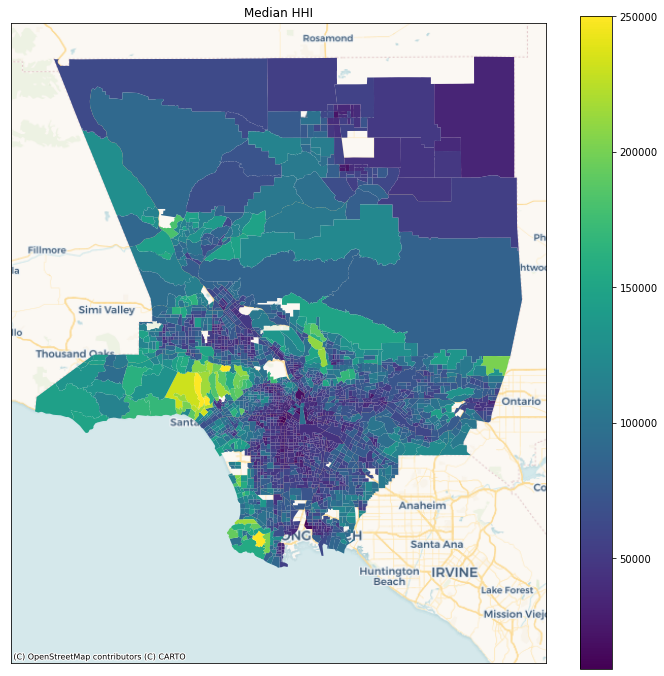

In [19]:
import matplotlib.pyplot as plt
import contextily as ctx

fig, ax = plt.subplots(figsize=(12, 12))
lacounty.plot('Median HHI', ax = ax, legend=True)

# remove the tick labels
ax.set_xticks([])
ax.set_yticks([])

# set the limits to remove Catalina
ax.set_ylim([3.96*1e6, 4.15*1e6])

ax.set_title('Median HHI')
ctx.add_basemap(ax, crs=lacounty.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

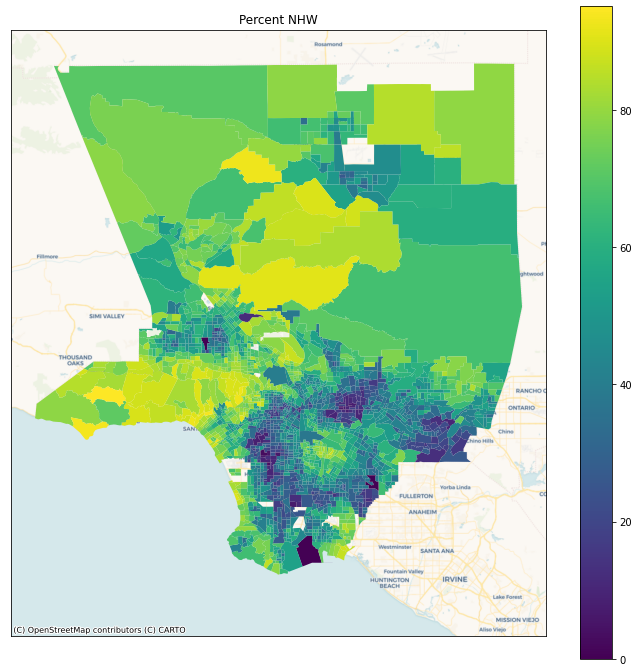

In [20]:
fig, ax = plt.subplots(figsize=(12, 12))
lacounty.plot('PctNHW', ax = ax, legend=True)

# remove the tick labels
ax.set_xticks([])
ax.set_yticks([])

# set the limits to remove Catalina
ax.set_ylim([3.97*1e6, 4.15*1e6])

ax.set_title('Percent NHW')
ctx.add_basemap(ax, crs=lacounty.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

<AxesSubplot:>

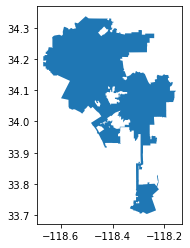

In [21]:
import geopandas as gpd

LA_boundary = gpd.read_file('City_Boundary.geojson')
LA_boundary.plot()

In [22]:
LA_boundary = LA_boundary.to_crs(epsg=4326)
lacounty=lacounty.to_crs(epsg=4326)

In [23]:
lacounty_clipped=lacounty.clip(LA_boundary)

<AxesSubplot:>

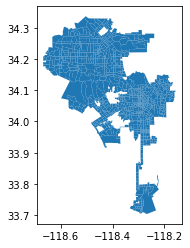

In [24]:
lacounty_clipped.plot()

Text(0.5, 1.0, 'Percent NHW')

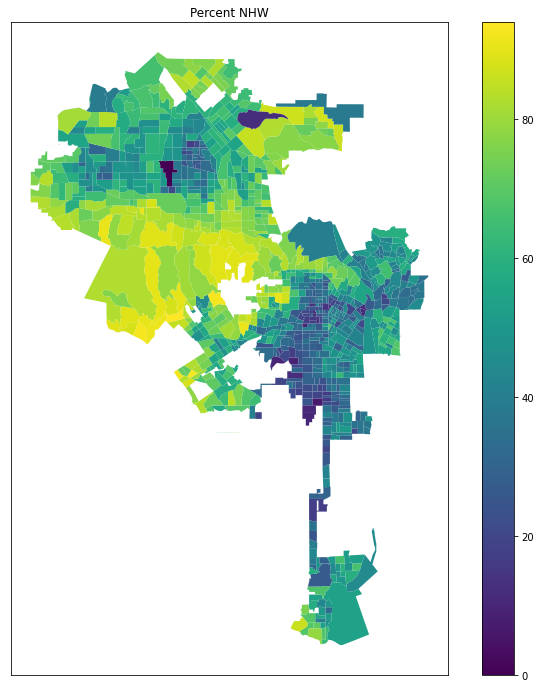

In [19]:
fig, ax = plt.subplots(figsize=(12, 12))
lacounty_clipped.plot('PctNHW', ax = ax, legend=True)

# remove the tick labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Percent NHW')
#ctx.add_basemap(ax, crs=lacounty.crs.to_string(), source=ctx.providers.CartoDB.Voyager)

In [25]:
lacounty_clipped.to_file("Data/lacounty_clipped.geojson", driver='GeoJSON')




In [26]:
lacounty_clipped.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1149 entries, 06037274202 to 06037460800
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   geometry        1149 non-null   geometry
 1   TotalPop        1149 non-null   float64 
 2   WhitePop        1149 non-null   float64 
 3   BlackorAA       1149 non-null   float64 
 4   AmInd_AKnative  1149 non-null   float64 
 5   Asian           1149 non-null   float64 
 6   Hawaiian_PI     1149 non-null   float64 
 7   Other           1149 non-null   float64 
 8   EducTotal       1149 non-null   float64 
 9   Median HHI      1133 non-null   float64 
 10  NAME            1149 non-null   object  
 11  state           1149 non-null   object  
 12  county          1149 non-null   object  
 13  tract           1149 non-null   object  
 14  EducBachelor    1149 non-null   float64 
 15  EducMasters     1149 non-null   float64 
 16  EducProf        1149 non-null   float64 